In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler           #import the necessary modules 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.preprocessing import image  
  

In [3]:
data = pd.read_csv('C:/Users/vasil/Desktop/tensorflow/FER/data/icml_face_data.csv')
pixel_data = data[' pixels']
label_data = data['emotion']            #open the csv file and categorize the data to pictures and emotions

In [4]:
def preprocess_pixels(pixel_data):
    images=[]
    for i in range(len(pixel_data)):
        img = np.fromstring(pixel_data[i], dtype='int', sep=' ')    #define the function to iterate and reshape the images to a 48x48x1 format
        img = img.reshape(48,48,1)
        images.append(img)
    X = np.array(images)
    return X

In [5]:
oversampler = RandomOverSampler(sampling_strategy='auto')
X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)  #oversampling magic to equalize the dataset
X_over_series = pd.Series(X_over.flatten()) #flatten the dataframe of the images

In [6]:
X = preprocess_pixels(X_over_series)
Y = Y_over                                              #use the fuction from earlier to the oversampled images
Y = Y_over.values.reshape(Y.shape[0],1)                 #reshape the values of the emotions                                 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45) #split the dataset to training and testing batches 

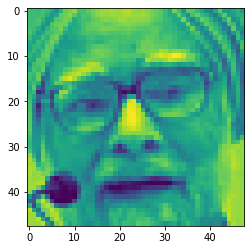

In [6]:
plt.imshow(X[1,:,:,0])              #plot the first picture of the dataset

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 50)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('bestmodel', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only= True )
log_folder = '/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_folder, histogram_freq = 1)

In [8]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', strides=(1,1), input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', strides=(1,1), padding='same'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', strides=(1,1), padding ='valid'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax')





    
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 21, 128)       5

In [10]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [11]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
y_train=tf.keras.utils.to_categorical(Y_train, num_classes = 7)
y_test=tf.keras.utils.to_categorical(Y_test, num_classes = 7)


In [13]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks =[model_checkpoint,early_stopping,tensorboard_callback])

Epoch 1/200
1770/1770 [==============================] - 69s 39ms/step - loss: 1.4109 - accuracy: 0.4600 - val_loss: 1.1687 - val_accuracy: 0.5573

Epoch 00001: val_accuracy improved from -inf to 0.55729, saving model to bestmodel
INFO:tensorflow:Assets written to: bestmodel\assets
Epoch 2/200
1770/1770 [==============================] - 67s 38ms/step - loss: 1.1990 - accuracy: 0.5412 - val_loss: 1.0264 - val_accuracy: 0.6081

Epoch 00002: val_accuracy improved from 0.55729 to 0.60814, saving model to bestmodel
INFO:tensorflow:Assets written to: bestmodel\assets
Epoch 3/200
1770/1770 [==============================] - 67s 38ms/step - loss: 1.0583 - accuracy: 0.5988 - val_loss: 0.9187 - val_accuracy: 0.6488

Epoch 00003: val_accuracy improved from 0.60814 to 0.64882, saving model to bestmodel
INFO:tensorflow:Assets written to: bestmodel\assets
Epoch 4/200
1770/1770 [==============================] - 66s 38ms/step - loss: 0.9520 - accuracy: 0.6374 - val_loss: 0.8725 - val_accuracy: 0.669

In [5]:
model=tf.keras.models.load_model('modelfinal')
#preds=model.predict(X_train)
#def get_class(preds):
#    pred_class=np.zeros((preds.shape[0],1))
    
#    for i in range(len(preds)):
 #       pred_class[i] = np.argmax(preds[i])

 #   return pred_class
#pred_class_train=get_class(preds)




In [21]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
img_path = 'C:/Users/vasil/Desktop/tensorflow/FER/code/AI/src/jupyter/pictures/cc2.jpeg'
img= image.load_img(img_path, color_mode='grayscale', target_size=(48,48))
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model.predict(x))
print('The predicted result is: ' + label_dict[prediction])
print(model.predict(x))

The predicted result is: Angry
[[9.9637860e-01 8.0642199e-14 3.3487491e-03 6.6112091e-16 2.7186517e-04
  1.3191911e-16 8.6216943e-07]]


In [ ]:
#python -m tensorboard.main --logdir=logs/ insert this in terminal for magic